<a href="https://colab.research.google.com/github/CynthiaJerono/Bernoulli-and-Binomial-Distributuion/blob/main/Multiple_Linear_Regression_%26_Transformation_of_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

Coefficients: [  202.30492651 13592.48781105  -410.79023165]
Intercept: 134973.87453740335


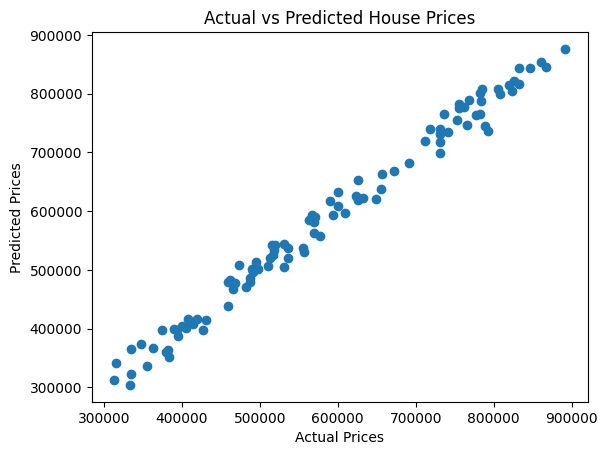

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simulated data: square footage, number of bedrooms, and house age
np.random.seed(42)
square_footage = np.random.randint(800, 3500, 100)
bedrooms = np.random.randint(1, 5, 100)
house_age = np.random.randint(1, 100, 100)
house_prices = 150000 + 200 * square_footage + 10000 * bedrooms - 500 * house_age + np.random.randn(100) * 20000

# Creating a DataFrame
data = pd.DataFrame({'SquareFootage': square_footage, 'Bedrooms': bedrooms, 'HouseAge': house_age, 'HousePrices': house_prices})

# Fitting a multiple linear regression model
X = data[['SquareFootage', 'Bedrooms', 'HouseAge']]
y = data['HousePrices']
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Predicting house prices
predicted_prices = model.predict(X)

# Scatter plot of actual vs predicted prices
plt.scatter(y, predicted_prices)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


# Multiple Regression Model Evaluation and Interpretation

In [ ]:
from sklearn.metrics import r2_score

# Calculating R-squared
r2 = r2_score(y, predicted_prices)
print(f'R-squared: {r2}')

# Calculating Adjusted R-squared
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f'Adjusted R-squared: {adj_r2}')


R-squared: 0.986721734310697
Adjusted R-squared: 0.9863067885079063


# Iteration in the Modeling Process - Improving a Baseline Model

New Coefficients: [  202.67912605 13849.62701222  -415.35214505  1053.79629541]
New Intercept: 128137.80302979518


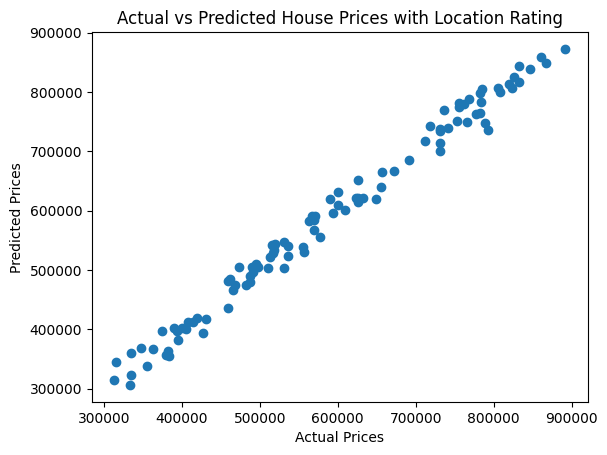

In [ ]:
# Adding more features
np.random.seed(42)
location_rating = np.random.randint(1, 10, 100)
house_prices += location_rating * 5000

# Updating the DataFrame
data['LocationRating'] = location_rating
X = data[['SquareFootage', 'Bedrooms', 'HouseAge', 'LocationRating']]
model.fit(X, y)

# Print the new coefficients
print(f'New Coefficients: {model.coef_}')
print(f'New Intercept: {model.intercept_}')

# Predicting house prices with new features
predicted_prices = model.predict(X)

# Scatter plot of actual vs predicted prices with new features
plt.scatter(y, predicted_prices)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices with Location Rating')
plt.show()


# Dealing with Categorical Variables

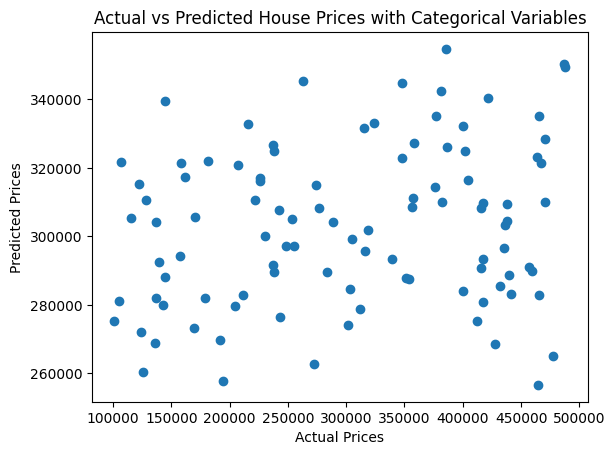

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Simulated categorical data
neighborhood = np.random.choice(['A', 'B', 'C'], 100)

# Simulated additional data for demonstration
data = pd.DataFrame({
    'SquareFootage': np.random.randint(1000, 3000, size=100),
    'Bedrooms': np.random.randint(1, 5, size=100),
    'HouseAge': np.random.randint(1, 30, size=100),
    'LocationRating': np.random.randint(1, 10, size=100)
})
y = np.random.randint(100000, 500000, size=100)  # Simulated target variable

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
neighborhood_encoded = encoder.fit_transform(neighborhood.reshape(-1, 1))

# Flatten the list of categories
encoded_columns = [f'neighborhood_{cat}' for cat in encoder.categories_[0]]

# Updating the DataFrame
neighborhood_df = pd.DataFrame(neighborhood_encoded, columns=encoded_columns)
data = pd.concat([data, neighborhood_df], axis=1)

# Define feature columns
X = data[['SquareFootage', 'Bedrooms', 'HouseAge', 'LocationRating'] + encoded_columns]

# Fitting the model with categorical variables
model = LinearRegression()
model.fit(X, y)

# Predicting house prices with categorical variables
predicted_prices = model.predict(X)

# Scatter plot of actual vs predicted prices with categorical variables
plt.scatter(y, predicted_prices)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices with Categorical Variables')
plt.show()


# Error Metrics: MAE and RMSE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating MAE
mae = mean_absolute_error(y, predicted_prices)
print(f'Mean Absolute Error: {mae}')

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y, predicted_prices))
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 100167.91368902188
Root Mean Squared Error: 114941.81224722664
